# Библиотеки

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget    # interactive 3d plots
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_evaluation
import plotting_utils
import model_training

/home/vrtx26/.local/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [1]:
# run this function if you need to generate a csv data set from scratch
# X, y, ID = data_loader.load_dataset(should_generate_dataset=True, 
#                                     use_vad=False, 
#                                     use_delta_mfcc=False,
#                                     use_delta_delta_mfcc=True)

In [17]:
X, y, ID = data_loader.load_dataset(X_path='data/2023-11-08/feature_mfcc_34_delta_delta_nfft_4096.csv', 
                                    y_path='data/2023-11-08/y_labels_feature_34_mfcc_delta_delta_nfft_4096.csv',
                                    ID_path='data/2023-11-08/IDs_feature_mfcc_34_delta_delta_nfft_4096.csv') 

data loaded in 0.09361672401428223ms
          0         1         2         3         4         5         6  \
0  0.327805 -0.464719 -0.540320 -0.983787 -1.276392 -0.517576 -0.059207   
1 -0.483202 -0.287426  0.073267 -0.259939 -1.043461  0.220426 -0.243781   
2 -0.982079  1.092156 -0.237941 -0.002997 -0.934974  0.313563  0.708375   
3  0.968642 -1.604765 -0.123183 -0.789169 -1.783557 -0.222486 -0.352760   
4  0.548607 -1.485735 -0.842989 -0.959707 -1.563772 -0.373401 -0.273213   

          7         8         9  ...       296       297       298       299  \
0 -1.325718 -0.865250 -1.400271  ... -0.000500  0.245232  0.467592  0.179897   
1 -0.745799 -0.558315 -0.667095  ...  0.081401 -0.156604  0.054227  1.335473   
2  0.392641 -0.112142 -0.675854  ...  1.159202 -0.281807  0.370446  0.969862   
3 -1.354752 -0.871037 -0.944073  ... -0.582348  1.606737 -1.213523  0.283672   
4 -1.374351 -0.530736 -0.333489  ... -0.312877 -1.016252 -0.713702  0.537837   

        300       301       302

In [18]:
ID['0'].unique()    # actors

array([22,  9, 18,  6, 24,  3, 21, 12, 14, 15,  5, 20, 23,  4,  8, 13, 11,
       10,  7,  2, 19,  1, 17, 16])

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Columns: 306 entries, 0 to 305
dtypes: float64(306)
memory usage: 3.4 MB


In [20]:
group_members= data_loader.get_k_fold_group_member()


X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
print(len(X_k_folds))

5


## SVM with RBF kernel

In [21]:
# C = [0.01, 0.05, 0.1, 1.0, 10, 100]
# gamma = [100, 10, 1, 0.1, 0.01, 0.001]

C = np.logspace(-1, 2, 12, endpoint=True)
gamma = np.logspace(-3.5, -1.5, 10, endpoint=True)

UAR_list = []
UAR_best = 0
UAR_surf = np.zeros((len(C),len(gamma)))

for i in range(len(C)):
    for j in range(len(gamma)):
        model = SVC(kernel = 'rbf', C=C[i], gamma=gamma[j], random_state = 42)
        UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
        UAR_surf[i,j] = UAR
        if UAR_best<UAR:
            UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
            C_best = C[i]
            gamma_best = gamma[j]
            print(f'C = {C[i]:.6f}, gamma = {gamma[j]:.6f}')
        UAR_list.append(UAR) 

print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.6f}, gamma_best = {gamma_best:.6f}')

  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.303
C = 0.100000, gamma = 0.000316


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.309
C = 0.100000, gamma = 0.000527


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.324
C = 0.100000, gamma = 0.000880


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.355
C = 0.100000, gamma = 0.001468


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.373
C = 0.100000, gamma = 0.002448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.385
C = 0.100000, gamma = 0.004084


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.357


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.281


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.182


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.130


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.310


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.338


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.372


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.399
C = 0.187382, gamma = 0.001468


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.410
C = 0.187382, gamma = 0.002448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.395


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.370


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.283


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.182


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.130


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.18it/s]

UAR = 0.357


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.28it/s]

UAR = 0.395


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.14it/s]

UAR = 0.408


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.05it/s]

UAR = 0.415
C = 0.351119, gamma = 0.001468


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.421
C = 0.351119, gamma = 0.002448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.411


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.388


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.309


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.182


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.130


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.33it/s]

UAR = 0.404


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.29it/s]

UAR = 0.419


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.37it/s]

UAR = 0.421


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.36it/s]

UAR = 0.425
C = 0.657933, gamma = 0.001468


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.34it/s]

UAR = 0.439
C = 0.657933, gamma = 0.002448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.450
C = 0.657933, gamma = 0.004084


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.433


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.361


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.206


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.42it/s]

UAR = 0.130


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.60it/s]

UAR = 0.417


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.55it/s]

UAR = 0.417


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.50it/s]

UAR = 0.435


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.36it/s]

UAR = 0.460
C = 1.232847, gamma = 0.001468


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.469
C = 1.232847, gamma = 0.002448


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.471
C = 1.232847, gamma = 0.004084


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.447


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.397


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.318


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.60it/s]

UAR = 0.180


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.98it/s]

UAR = 0.421


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.19it/s]

UAR = 0.436


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.80it/s]

UAR = 0.458


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.57it/s]

UAR = 0.476
C = 2.310130, gamma = 0.001468


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.471


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.468


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.449


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.398


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.318


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.17it/s]

UAR = 0.180


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.26it/s]

UAR = 0.439


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.47it/s]

UAR = 0.460


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.86it/s]

UAR = 0.468


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.11it/s]

UAR = 0.469


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.469


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.460


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.446


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.398


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.318


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.32it/s]

UAR = 0.180


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.95it/s]

UAR = 0.458


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.56it/s]

UAR = 0.462


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.94it/s]

UAR = 0.471


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.469


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.460


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.460


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.446


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.398


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.318


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.93it/s]

UAR = 0.180


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.87it/s]

UAR = 0.466


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.65it/s]

UAR = 0.465


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.61it/s]

UAR = 0.457


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.464


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.458


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.460


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.446


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.398


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.318


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.19it/s]

UAR = 0.180


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.20it/s]

UAR = 0.459


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.35it/s]

UAR = 0.455


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.70it/s]

UAR = 0.458


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.462


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.458


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.460


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.446


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.398


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.318


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.21it/s]

UAR = 0.180


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.00it/s]

UAR = 0.451


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.34it/s]

UAR = 0.451


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.68it/s]

UAR = 0.453


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.462


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.458


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.460


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.446


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.398


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.318


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.31it/s]

UAR = 0.180


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  7.15it/s]

UAR = 0.445


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  6.43it/s]

UAR = 0.445


 20%|████████████████████████████████████▊                                                                                                                                                   | 1/5 [00:00<00:00,  5.53it/s]

UAR = 0.453


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.462


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.458


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.460


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.446


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.398


  0%|                                                                                                                                                                                                | 0/5 [00:00<?, ?it/s]

UAR = 0.318


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.03it/s]

UAR = 0.180
UAR_best = 0.476, C_best = 2.310130, gamma_best = 0.001468


## Result visualization

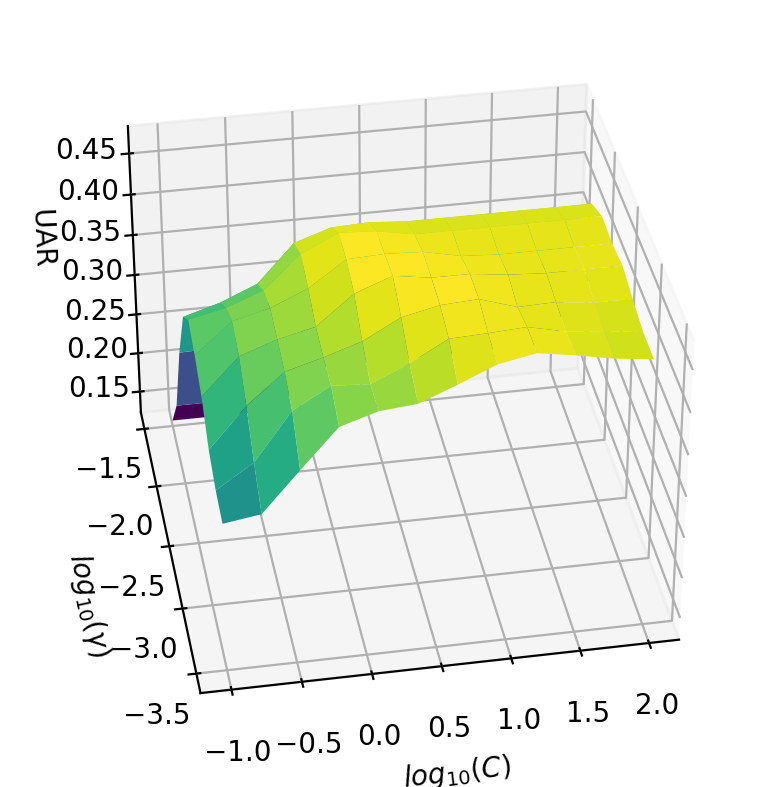

In [22]:
fig = plt.figure(dpi=200)
ax = plt.axes(projection='3d')

log_g, log_C = np.meshgrid(np.log10(gamma),np.log10(C))

# ax.plot_surface(np.log10(C), np.log10(gamma), UAR_surf, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
ax.plot_surface(log_C, log_g, UAR_surf, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
# ax.scatter(log_C, log_g, UAR_surf, c=UAR_surf, cmap='viridis', linewidth=0.5)
# ax.bar3d(np.log10(C), np.log10(gamma), UAR_surf,dx=1, dy=1, dz=1)
ax.set_xlabel('$log_{10}(C)$')
ax.set_ylabel('$log_{10}(\gamma)$')
# ax.set_title('UAR')
ax.set_zlabel('$\mathrm{UAR}$')
ax.view_init(35, 260)
# plt.show()
# image_path = "Doc/figures/UAR_svm_rbf_4096.jpg"
# fig.savefig(image_path, format='jpg', dpi=200, bbox_inches='tight', pad_inches=0.2)

## Results and confusion matrix

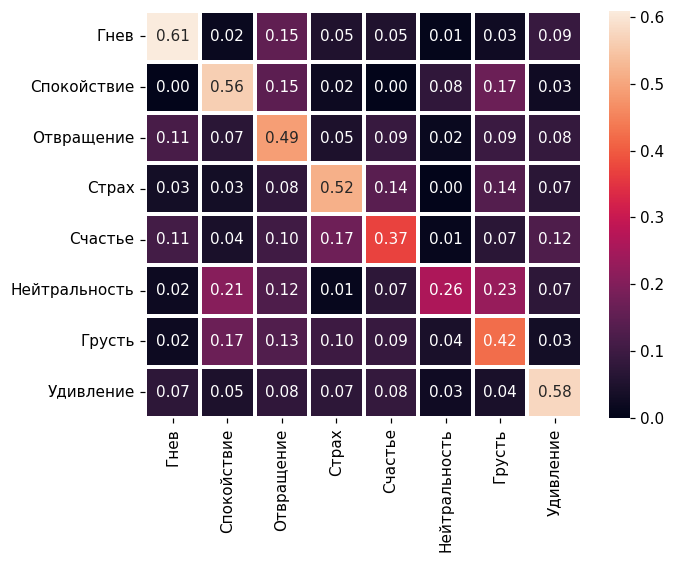

Saving confusion matrix with name:  Doc/figures/confusion_matrix.jpg


In [24]:
plotting_utils.plot_confusion_matrix(y_test, y_true, y_pred)